In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config1 import weather_api_key
import time
from datetime import datetime
# Import the requests library.
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = (citipy.nearest_city(coordinate[0], coordinate[1]).city_name)

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []


# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, cities[i]))
    record_count +=1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    #print(city_url)
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
       
        # Append the city information into city_data list.
        city_data.append({"City": cities[i],
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
      

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pangnirtung
Processing Record 2 of Set 1 | port blair
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | airai
Processing Record 5 of Set 1 | leningradskiy
Processing Record 6 of Set 1 | ahuimanu
Processing Record 7 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 1 | ixtapa
Processing Record 9 of Set 1 | islamkot
Processing Record 10 of Set 1 | kirakira
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | arman
Processing Record 14 of Set 1 | waingapu
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | ijui
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | amderma
City not found

Processing Record 39 of Set 4 | beringovskiy
Processing Record 40 of Set 4 | sheridan
Processing Record 41 of Set 4 | scarborough
Processing Record 42 of Set 4 | yellowknife
Processing Record 43 of Set 4 | rawson
Processing Record 44 of Set 4 | champerico
Processing Record 45 of Set 4 | buon me thuot
City not found. Skipping...
Processing Record 46 of Set 4 | dong hoi
Processing Record 47 of Set 4 | astana
Processing Record 48 of Set 4 | porto empedocle
Processing Record 49 of Set 4 | subaytilah
City not found. Skipping...
Processing Record 50 of Set 4 | saint-joseph
Processing Record 1 of Set 5 | vitim
Processing Record 2 of Set 5 | burns lake
Processing Record 3 of Set 5 | iqaluit
Processing Record 4 of Set 5 | bur gabo
City not found. Skipping...
Processing Record 5 of Set 5 | kedrovyy
Processing Record 6 of Set 5 | dunedin
Processing Record 7 of Set 5 | gazojak
Processing Record 8 of Set 5 | caravelas
Processing Record 9 of Set 5 | lexington
Processing Record 10 of Set 5 | colwyn b

Processing Record 28 of Set 8 | sibolga
Processing Record 29 of Set 8 | homer
Processing Record 30 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 31 of Set 8 | bezhetsk
Processing Record 32 of Set 8 | mersing
Processing Record 33 of Set 8 | baijiantan
Processing Record 34 of Set 8 | tadine
Processing Record 35 of Set 8 | acapulco
Processing Record 36 of Set 8 | balykshi
Processing Record 37 of Set 8 | talnakh
Processing Record 38 of Set 8 | pisco
Processing Record 39 of Set 8 | olafsvik
Processing Record 40 of Set 8 | tres lagoas
Processing Record 41 of Set 8 | quatre cocos
Processing Record 42 of Set 8 | zhangjiakou
Processing Record 43 of Set 8 | calabozo
Processing Record 44 of Set 8 | penzance
Processing Record 45 of Set 8 | maneadero
Processing Record 46 of Set 8 | bogande
Processing Record 47 of Set 8 | edgewater
Processing Record 48 of Set 8 | kununurra
Processing Record 49 of Set 8 | kahului
Processing Record 50 of Set 8 | brownsville
Processing

Processing Record 17 of Set 12 | huamachuco
Processing Record 18 of Set 12 | zhaozhou
Processing Record 19 of Set 12 | sidi ali
Processing Record 20 of Set 12 | katangli
Processing Record 21 of Set 12 | mount isa
Processing Record 22 of Set 12 | carutapera
Processing Record 23 of Set 12 | lakes entrance
Processing Record 24 of Set 12 | muros
Processing Record 25 of Set 12 | muswellbrook
Processing Record 26 of Set 12 | fasa
Processing Record 27 of Set 12 | gitarama
Processing Record 28 of Set 12 | songea
Processing Record 29 of Set 12 | voiron
Processing Record 30 of Set 12 | khonsa
Processing Record 31 of Set 12 | tambura
Processing Record 32 of Set 12 | cabinda
Processing Record 33 of Set 12 | tabou
Processing Record 34 of Set 12 | alotau
City not found. Skipping...
Processing Record 35 of Set 12 | ahvaz
Processing Record 36 of Set 12 | antofagasta
Processing Record 37 of Set 12 | berdigestyakh
Processing Record 38 of Set 12 | tlacotepec
Processing Record 39 of Set 12 | qandala
Proce

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pangnirtung,66.1451,-65.7125,-18.40,69,40,3.44,CA,2022-02-05 02:25:46
1,port blair,11.6667,92.7500,82.44,78,40,9.22,IN,2022-02-05 02:25:47
2,jamestown,42.0970,-79.2353,18.72,66,100,1.99,US,2022-02-05 02:24:46
3,airai,-8.9266,125.4092,71.62,69,100,2.10,TL,2022-02-05 02:22:45
4,leningradskiy,69.3833,178.4167,-16.17,93,62,8.12,RU,2022-02-05 02:23:24
5,ahuimanu,21.4447,-157.8378,78.85,64,20,3.00,US,2022-02-05 02:25:47
6,ixtapa,20.7000,-105.2000,72.63,73,75,5.75,MX,2022-02-05 02:25:48
7,islamkot,24.6997,70.1770,59.56,83,0,6.98,PK,2022-02-05 02:25:48
8,kirakira,-10.4544,161.9205,84.25,75,100,6.15,SB,2022-02-05 02:25:49
9,saskylakh,71.9167,114.0833,-9.00,99,99,5.28,RU,2022-02-05 02:25:49


In [8]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,pangnirtung,CA,2022-02-05 02:25:46,66.1451,-65.7125,-18.40,69,40,3.44
1,port blair,IN,2022-02-05 02:25:47,11.6667,92.7500,82.44,78,40,9.22
2,jamestown,US,2022-02-05 02:24:46,42.0970,-79.2353,18.72,66,100,1.99
3,airai,TL,2022-02-05 02:22:45,-8.9266,125.4092,71.62,69,100,2.10
4,leningradskiy,RU,2022-02-05 02:23:24,69.3833,178.4167,-16.17,93,62,8.12
5,ahuimanu,US,2022-02-05 02:25:47,21.4447,-157.8378,78.85,64,20,3.00
6,ixtapa,MX,2022-02-05 02:25:48,20.7000,-105.2000,72.63,73,75,5.75
7,islamkot,PK,2022-02-05 02:25:48,24.6997,70.1770,59.56,83,0,6.98
8,kirakira,SB,2022-02-05 02:25:49,-10.4544,161.9205,84.25,75,100,6.15
9,saskylakh,RU,2022-02-05 02:25:49,71.9167,114.0833,-9.00,99,99,5.28


In [12]:
#Create the output file (CSV)
output_data_file = "weatherpy_cities.csv"

#Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')



In [13]:
#Extract relevant fields from the data frame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

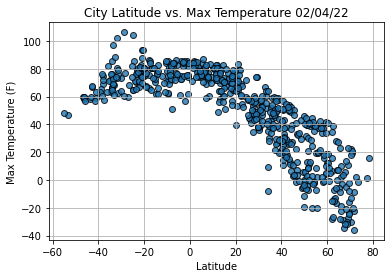

In [15]:
#plotting weather data

#Import time module
import time

#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, 
            max_temps, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data_Fig1.png')

#Show plot
plt.show()

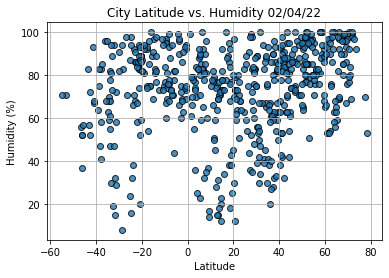

In [16]:
#Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data_Fig2.png')

#Show plot
plt.show()

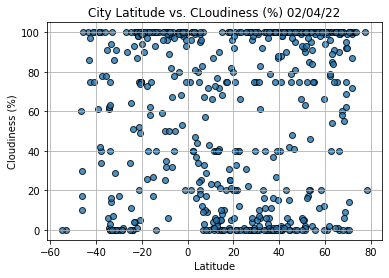

In [17]:
#Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. CLoudiness (%) '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data_Fig3.png')

#Show plot
plt.show()

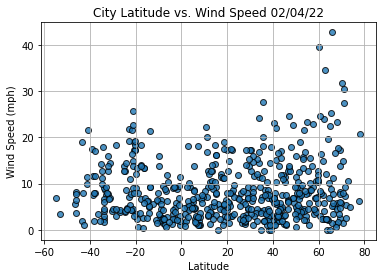

In [18]:
#Build the scatter plot for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data_Fig4.png')

#Show plot
plt.show()